<a href="https://colab.research.google.com/github/puspraj123/nepali_number_classifier-/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import shutil


In [8]:
!unzip /content/all_numbers_tiles.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/all_numbers_tiles/5.img179.jpg  
  inflating: /content/__MACOSX/all_numbers_tiles/._5.img179.jpg  
  inflating: /content/all_numbers_tiles/9.img300.jpg  
  inflating: /content/__MACOSX/all_numbers_tiles/._9.img300.jpg  
  inflating: /content/all_numbers_tiles/5.img10.jpg  
  inflating: /content/__MACOSX/all_numbers_tiles/._5.img10.jpg  
  inflating: /content/all_numbers_tiles/2.img308.jpg  
  inflating: /content/__MACOSX/all_numbers_tiles/._2.img308.jpg  
  inflating: /content/all_numbers_tiles/4.img263.jpg  
  inflating: /content/__MACOSX/all_numbers_tiles/._4.img263.jpg  
  inflating: /content/all_numbers_tiles/5.img38.jpg  
  inflating: /content/__MACOSX/all_numbers_tiles/._5.img38.jpg  
  inflating: /content/all_numbers_tiles/9.img328.jpg  
  inflating: /content/__MACOSX/all_numbers_tiles/._9.img328.jpg  
  inflating: /content/all_numbers_tiles/2.img320.jpg  
  inflating: /content/__MACOSX/all_numbers_tiles/._

In [10]:
# path where images are stored(colab directory)
data_path = "/content/all_numbers_tiles"


print("Total files:", len(os.listdir(data_path)))


Total files: 5303


In [11]:
data = []
filenames = []

for file in os.listdir(data_path):
    if file.endswith(".jpg"):
        img_path = os.path.join(data_path, file)


        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


        img = cv2.resize(img, (28, 28))


        data.append(img.flatten())
        filenames.append(file)

data = np.array(data)

print("Images loaded:", data.shape[0])
print("vector size:", data.shape[1])


Images loaded: 5302
vector size: 784


In [12]:
# total clusters: 0–9 digits + ba + pa
k = 12

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(data)

print("Clustered")


Clustered


In [13]:
cluster_path = "/content/clusters"
os.makedirs(cluster_path, exist_ok=True)

for i in range(k):
    os.makedirs(os.path.join(cluster_path, f"group_{i}"), exist_ok=True)


In [14]:
#grouping images
for name, label in zip(filenames, labels):
    src = os.path.join(data_path, name)
    dst = os.path.join(cluster_path, f"group_{label}", name)
    shutil.copy(src, dst)

print("grouped")


grouped


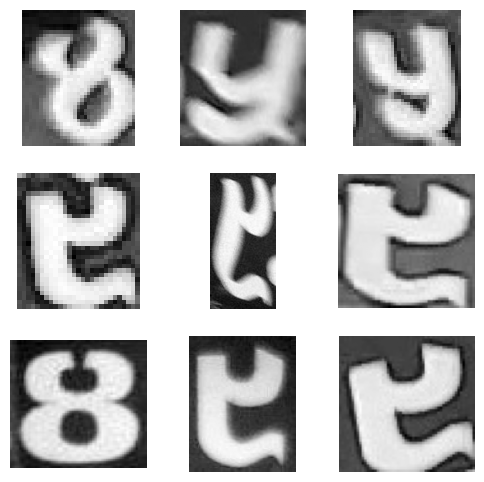

In [15]:
#To see images
def show_group(num):
    folder = os.path.join(cluster_path, f"group_{num}")
    imgs = os.listdir(folder)[:9]

    plt.figure(figsize=(6,6))
    for i, img_name in enumerate(imgs):
        img = cv2.imread(os.path.join(folder, img_name), cv2.IMREAD_GRAYSCALE)
        plt.subplot(3,3,i+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
    plt.show()

show_group(0)
